<h2>Importing Libraries and Data</h2>

In [6]:
#Imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import statistics
from math import sqrt
from math import pi
from math import exp
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn import datasets, metrics, model_selection, svm
import scikitplot as skplt
import matplotlib.pyplot as plt

In [7]:
#Reading CSV Files
mainFile = 'spambase.csv'
df = pd.read_csv(mainFile)

In [8]:
# Train / Test Split

train = df.drop(columns=['class'])
results = df['class']
X_train,X_test,y_train,y_test=train_test_split(train,results,test_size=0.25,random_state=0)

<h2>Data Processing</h2>

In [9]:
# Preprocessing / Normalizing
min_max_scaler = preprocessing.MinMaxScaler()
X_train_scaled = min_max_scaler.fit_transform(X_train)
X_test_scaled = min_max_scaler.transform(X_test)

<h2>Custom Naive Bayes Classifier</h2>

In [10]:
# Naive Bayes Class
    
class NaiveBayes:
    def __init__(self):
        self.summaries = dict()
    
    def getSummaries(self):
        return self.summaries
    
    def predict(self, row):
        probabilities = dict()
        for class_value, summaries in self.summaries.items():
            probabilities[class_value] = 1
            for i in range(len(summaries)):
                mean = summaries[i][0]
                stdv = summaries[i][0]
                if stdv != 0:
                    temp = self._findProbability(row[i], mean, stdv)
                    probabilities[class_value] *= temp
        return max(probabilities, key=probabilities.get)
    
    def fit(self, train, goal):
        separated = self._seperateByClass(train, goal)
        for class_value, rows in separated.items():
            self.summaries[class_value] = self._summarizeDataset(rows)
        
    def _seperateByClass(self, train, goal):
        separated = dict()
        for i in range(len(train)):
            vector = train[i]
            class_value = goal.iloc[i]
            if (class_value not in separated):
                separated[class_value] = list()
            separated[class_value].append(vector)
        return separated
    
    def _summarizeDataset(self, data):
        summaries = [(sum(column)/float(len(column)), statistics.pstdev(column), len(column)) for column in zip(*data)]
        del(summaries[-1])
        return summaries
    
    def _findProbability(self, value, mean, stdev):
        exponent = exp(-((value-mean)**2 / (2 * stdev**2 )))
        return (1 / (sqrt(2 * pi) * stdev)) * exponent
        

In [11]:
nb = NaiveBayes()
nb.fit(X_train_scaled, y_train)
summary = nb.getSummaries()
TN = 0
FP = 0
FN = 0
TP = 0
y_predicted = []
for i in range(len(X_test_scaled)):
    temp = nb.predict(X_test_scaled[i])
    y_predicted.append(temp)
    if temp == 0 and y_test.iloc[i] == 0:
        TP += 1
    elif temp == 0 and y_test.iloc[i] == 1:
        FP += 1
    elif temp == 1 and y_test.iloc[i] == 1:
        TN += 1
    else:
        FN += 1

<h2>Analysis of Words Used</h2>

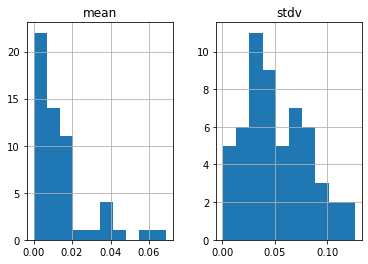

In [12]:
# Print Histogram of Spam
tempDF = pd.DataFrame(summary[0], columns=['mean', 'stdv', 'num'])
tempDF = tempDF.drop(columns=['num'])
hist = tempDF.hist()

In [13]:
# Max Influence Numbers
print(tempDF['mean'].idxmax())
print(tempDF['stdv'].idxmax())

18
26


<h4>This shows the columns with the greatest means and standard deviations which were "word_freq_you" and "word_freq_hpl" respectively for Spam emails</h4>

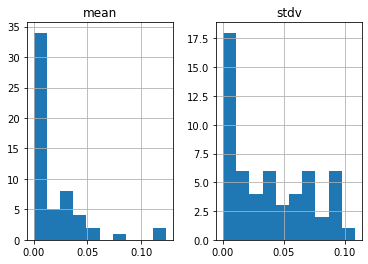

In [14]:
# Print Histogram of Ham
tempDF = pd.DataFrame(summary[1], columns=['mean', 'stdv', 'num'])
tempDF = tempDF.drop(columns=['num'])
hist = tempDF.hist()

In [15]:
print(tempDF['mean'].idxmax())
print(tempDF['stdv'].idxmax())

20
20


<h4>In the case of non-spam emails the max mean and standard deviation belonged to the same column of "word_freq_your"</h4>

<h2>Confusion Matrix and Auc / Roc Plot</h2>

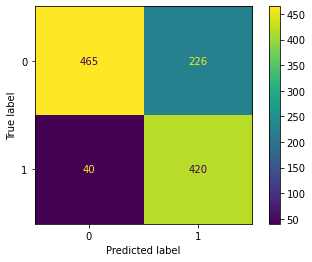

In [16]:
# Confusion Matrix
plot = ConfusionMatrixDisplay(confusion_matrix(y_test, y_predicted))
plot.plot()

In [12]:
# Compute from the Confusion Matrix
total = TP + TN + FN + FP
print("Accuracy is " + str((TP + TN )/total))
print("Precision is " + str(TP / (TP + FP)))
print("Recall is " + str(TP / (TP + FN)))

Accuracy is 0.7688966116420504
Precision is 0.9207920792079208
Recall is 0.6729377713458755


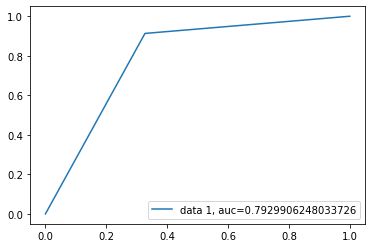

In [13]:
# Auc / Roc Plot
fpr, tpr, _ = metrics.roc_curve(y_test, y_predicted)
auc = metrics.roc_auc_score(y_test, y_predicted)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()